# 1. EDA

In [1]:
import os
import pandas as pd
from matplotlib import pyplot as plt
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
path = './ml-latest-small/'
movies_df = pd.read_csv(os.path.join(path + 'movies.csv'), index_col='movieId', encoding='utf-8')

In [3]:
movies_df.head()

,title,genres
movieId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


## 1. [movies.csv] 장르 분포 확인 및 원핫인코딩

In [4]:
genre_lists = [x.split('|') for x in movies_df['genres'].values]

unique_genres = set()
genre_counts = {}

for genre_list in genre_lists:
    unique_genres.update(genre_list)
    for genre in genre_list:
        genre_counts[genre] = genre_counts.get(genre, 0) + 1
    
unique_genres_list = list(unique_genres)
unique_genres_list

['War',
 'Comedy',
 'Documentary',
 'Sci-Fi',
 'Crime',
 'Children',
 'Thriller',
 'Fantasy',
 'Horror',
 'Film-Noir',
 'Action',
 'Drama',
 'Adventure',
 '(no genres listed)',
 'IMAX',
 'Musical',
 'Mystery',
 'Romance',
 'Western',
 'Animation']

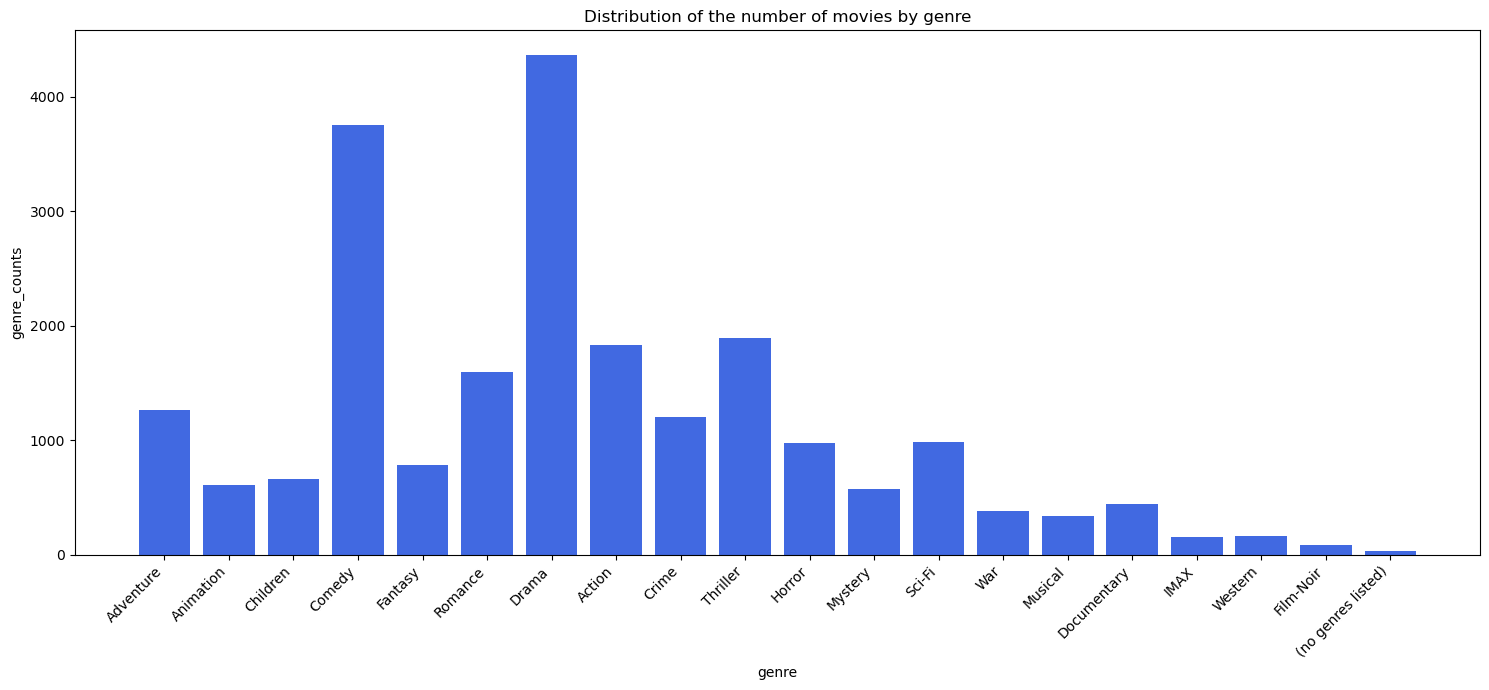

In [5]:
# 장르 분포 시각화
plt.figure(figsize=(15, 7))
plt.bar(genre_counts.keys(), genre_counts.values(), color='royalblue')
plt.xticks(rotation=45, ha='right')
plt.xlabel('genre')
plt.ylabel('genre_counts')
plt.title('Distribution of the number of movies by genre')
plt.tight_layout()
plt.show()

In [6]:
# One-hot encoding(장르 기준)
one_hot_encoded_df = pd.DataFrame(columns=unique_genres_list)

for genre_list in genre_lists:
    one_hot_encoded_row = {genre: 1 if genre in genre_list else 0 for genre in unique_genres_list}
    one_hot_encoded_df = one_hot_encoded_df.append(one_hot_encoded_row, ignore_index=True)

one_hot_encoded_df.head()

,War,Comedy,Documentary,Sci-Fi,Crime,Children,Thriller,Fantasy,Horror,Film-Noir,Action,Drama,Adventure,(no genres listed),IMAX,Musical,Mystery,Romance,Western,Animation
0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1
1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## 2. [movie.csv] Title 기준 연도별 분포 확인

In [7]:
# 연도 추출
movies_df['year'] = movies_df['title'].str.extract(r'\((\d{4})\)')

# 연도 기준 카운팅
year_counts = movies_df['year'].value_counts().sort_index()

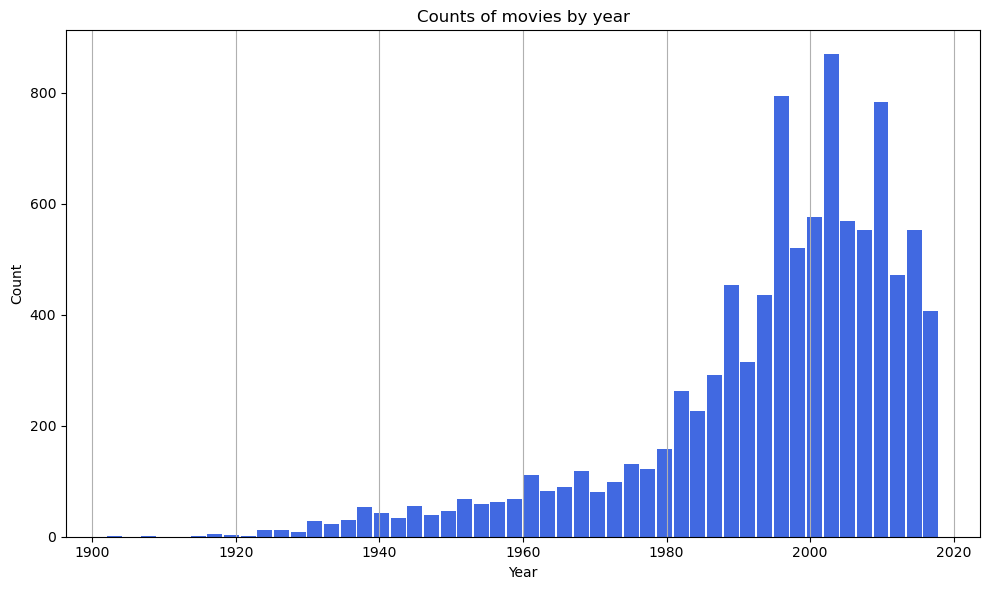

In [8]:
# 연도별 분포 시각화
plt.figure(figsize=(10, 6))
movies_df['year'].dropna().astype(int).hist(bins=50, color='royalblue', rwidth=0.9)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Counts of movies by year')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

## 3. [movie.csv] 연도별, 장르 분포 확인하기

<Figure size 1000x600 with 0 Axes>

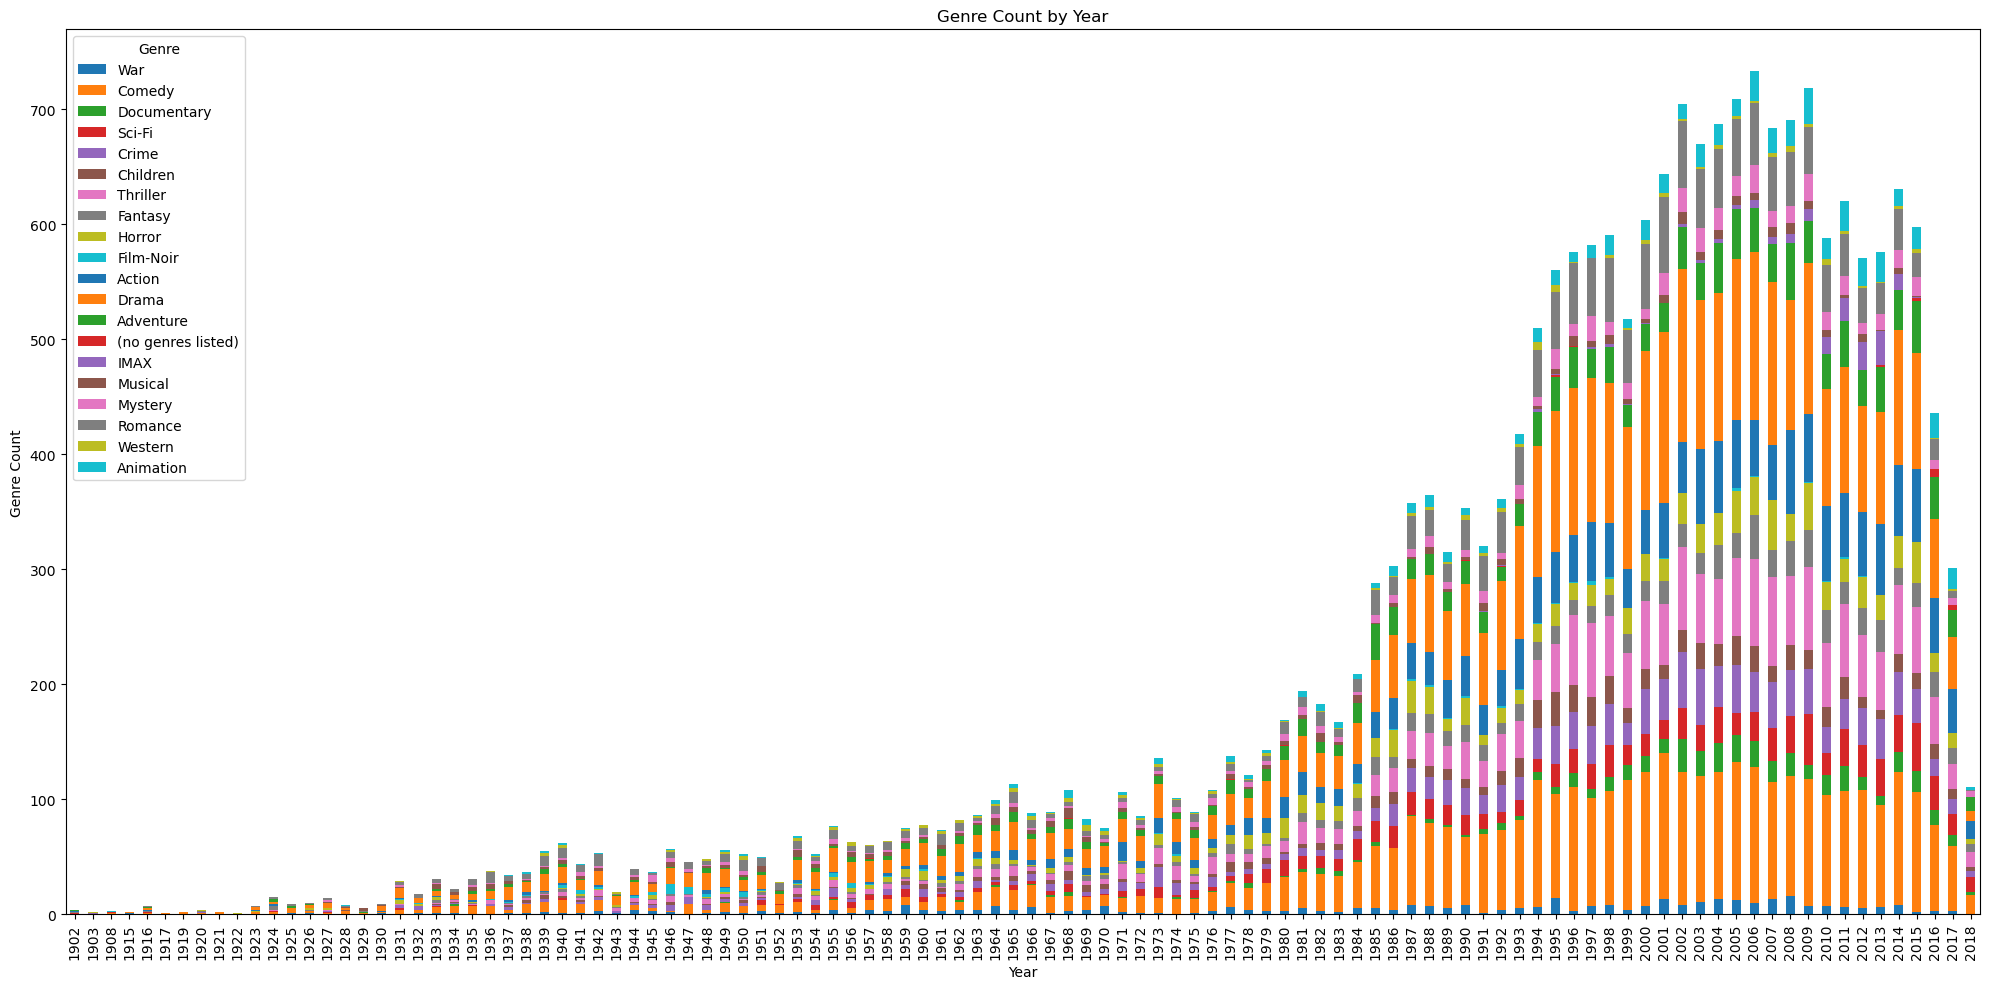

In [9]:
for genre in unique_genres_list:
    movies_df[genre] = movies_df['genres'].str.contains(genre).astype(int)

genre_by_year = movies_df.groupby('year').sum()

plt.figure(figsize=(10, 6))
genre_by_year[unique_genres_list].plot(kind='bar', stacked=True, figsize=(20, 10))
plt.xlabel('Year')
plt.ylabel('Genre Count')
plt.title('Genre Count by Year')
plt.legend(title='Genre')
plt.tight_layout()
plt.show()

In [10]:
movies_df.head()

,title,genres,year,War,Comedy,Documentary,Sci-Fi,Crime,Children,Thriller,...,Action,Drama,Adventure,(no genres listed),IMAX,Musical,Mystery,Romance,Western,Animation
movieId,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
2,Jumanji (1995),Adventure|Children|Fantasy,1995,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
3,Grumpier Old Men (1995),Comedy|Romance,1995,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
5,Father of the Bride Part II (1995),Comedy,1995,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 4. [ratings.csv]

In [11]:
ratings_df = pd.read_csv(os.path.join(path + 'ratings.csv'), encoding='utf-8')
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [16]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [15]:
ratings_df.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


<AxesSubplot:>

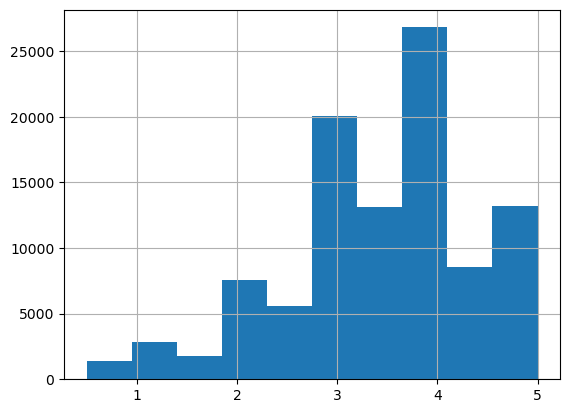

In [13]:
ratings_df['rating'].hist()

## 5. [tags.csv] 

In [12]:
tags_df = pd.read_csv(os.path.join(path + 'tags.csv'), encoding='utf-8')
tags_df.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [17]:
tags_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB


In [18]:
tags_df.describe()

,userId,movieId,timestamp
count,3683.000000,3683.000000,3.683000e+03
mean,431.149335,27252.013576,1.320032e+09
std,158.472553,43490.558803,1.721025e+08
min,2.000000,1.000000,1.137179e+09
25%,424.000000,1262.500000,1.137521e+09
50%,474.000000,4454.000000,1.269833e+09
75%,477.000000,39263.000000,1.498457e+09
max,610.000000,193565.000000,1.537099e+09


In [21]:
for col in tags_df.columns:
    print('col:',col)
    print(tags_df[col].value_counts()[:10])
    print('-----------------------------')

col: userId
474    1507
567     432
62      370
599     323
477     280
424     273
537     100
125      48
357      45
318      41
Name: userId, dtype: int64
-----------------------------
col: movieId
296       181
2959       54
924        41
293        35
7361       34
1732       32
4878       29
260        26
79132      26
135536     19
Name: movieId, dtype: int64
-----------------------------
col: tag
In Netflix queue     131
atmospheric           36
thought-provoking     24
superhero             24
funny                 23
surreal               23
Disney                23
religion              22
sci-fi                21
quirky                21
Name: tag, dtype: int64
-----------------------------
col: timestamp
1137271192    5
1138307125    5
1137201595    4
1137206826    4
1137202706    4
1186589105    4
1137206827    3
1138137660    3
1138307168    3
1137375171    3
Name: timestamp, dtype: int64
-----------------------------


# 2. Memory-based CF

In [24]:
links_df = pd.read_csv(os.path.join(path + 'links.csv'), index_col='movieId', encoding='utf-8')
movies_df = pd.read_csv(os.path.join(path + 'movies.csv'), index_col='movieId', encoding='utf-8')
ratings_df = pd.read_csv(os.path.join(path + 'ratings.csv'), index_col='movieId', encoding='utf-8')
tags_df = pd.read_csv(os.path.join(path + 'tags.csv'), index_col='movieId', encoding='utf-8')

In [23]:
from surprise import Dataset, Reader
from surprise.model_selection import train_test_split

# Reader를 설정합니다. 평점의 범위는 0.5부터 5까지입니다.
reader = Reader(rating_scale=(0.5, 5.0))

# ratings.csv 데이터를 Surprise의 Dataset 형식으로 로드합니다.
data = Dataset.load_from_df(ratings_df[['userId', 'movieId', 'rating']], reader)

# 데이터를 학습 데이터와 테스트 데이터로 분할합니다. (테스트 데이터의 비율은 20%로 설정합니다.)
trainset, testset = train_test_split(data, test_size=0.2)

ModuleNotFoundError: No module named 'surprise'

## KNN-BASIC

In [ ]:
from surprise import KNNBasic
from surprise.accuracy import rmse

knn_basic = KNNBasic()
knn_basic.fit(trainset)
predictions_knn_basic = knn_basic.test(testset)
rmse_knn_basic = rmse(predictions_knn_basic)

## KNN-with-ZScore

In [ ]:
from surprise import KNNWithZScore

knn_zscore = KNNWithZScore()
knn_zscore.fit(trainset)
predictions_knn_zscore = knn_zscore.test(testset)
rmse_knn_zscore = rmse(predictions_knn_zscore)

# 3. Model-based CF